## FTS Specifications

The following cells are used to determine the paramters for the FTS design

In [1]:
from numpy import *
import numpy as np

beam_angle_deg = 10.9

center_spacing = 90

#use mirror-center-at-focus rule to calculate semiminor axis
width = center_spacing/np.tan(beam_angle_deg*np.pi/180)


print(width)



467.36337346534765


## Solidworks Parameters

Because the transfer mirrors file uses different measurements than the standard ones above to define the mirrors we print here a table
of the different Solidworks parameters, as labelled in the Solidworks file for the transfer mirrors.

One dimension that is not listed because it cannot be labelled in Solidworks is to make sure to change the semimajor and semiminor axes of the ellipse itself - not just the dimension that place the ellipse (D1 & D2).  Otherwise the ellipse will not be the proper size and there will be inconsistencies in the measurements.

In [7]:
D0 = 10
D1 = 10*r2+5*D
D2 = b
D3 = H
D4 = 2*r2+D
D5 = 5*r2+2.5*D
D6 = D4
D7 = a
D8 = Z
D9 = Y
D10 = D4

cells = [
    ('a', f'{a:.2f} mm'),
    ('b', f'{b:.2f} mm'),
    ('D0', f'{D0:.2f} mm'),
    ('D1', f'{D1:.2f} mm'),
    ('D2', f'{D2:.2f} mm'),
    ('D3', f'{D3:.2f} mm'),
    ('D4', f'{D4:.2f} mm'),
    ('D5', f'{D5:.2f} mm'),
    ('D6', f'{D6:.2f} mm'),
    ('D7', f'{D7:.2f} mm'),
    ('D8', f'{D8:.2f} mm'),
    ('D9', f'{D9:.2f} mm'),
    ('D10', f'{D10:.2f} mm')
]

# Print the table
print(f"{'Parameter':<10}{'Value (mm)':<15}")
print("=" * 25)
for param, val in cells:
    print(f"{param:<10}{val:<15}")

Parameter Value (mm)     
a         1132.83 mm     
b         1123.71 mm     
D0        10.00 mm       
D1        717.54 mm      
D2        1123.71 mm     
D3        2.26 mm        
D4        143.51 mm      
D5        358.77 mm      
D6        143.51 mm      
D7        1132.83 mm     
D8        861.05 mm      
D9        142.35 mm      
D10       143.51 mm      


## Turn Mirror Specifications

The following cells are used to determine the parameters for the turn mirror.

The turn mirror in Solidworks is easiest started from scratch due to weird behaviour when trying to modify the position of the focus and vertex in the parabola sketch.  The steps for quickly sketching a new parabolic mirror are:

1) Choose start start sketching in the Front plane - the angle rotations will in Zemax will depend on this.

2) Sketch an off axis parabolic segment anywhere in the Front plane. (Try to have the segment straddle the origin).

3) Start by defining a horizontal relation between the vertex and focus point.

4) Draw a centerline between vertex and focus - this will be the rotation axis.

5) Smart dimension the appropriate distance between vertx and focus.

6) Set the position of the vertex point.  The focus should fall into the right position. Fix these points. (You can now delete the dimension)

7) Place to reference points, symmetric about the origin - these will be used to define the extent of the mirror. Fix the points.

8) Define a vertical relationships between these two points and the two ends of the mirror. (It should now be centered and pass through the origin.)

9) Revolve this sketch, about the vertex/focus centerline by an appropriate amount (to be able to fill the transfer mirror).

*N.B. Do not close the sketch - use a thin feature instead.  The direction should be that the origin lies on the inner edge of the mirror.*

10) You're done!

In [8]:
from numpy import *
#Entrance turn mirror equations (numbers to come)

#theta = (45+12.1948)*pi/180
#EFL = 27*25.4
    
#Equation 12
j = EFL*cos(theta)

#Equation 13
h = -EFL*sin(theta)

#Equation 14
m = EFL*cos(theta) + (EFL*sin(theta)**2)/(2*(cos(theta)-1))

#Equation 15
n = h

#Equation 16
PFL = j-m

#Mirror half width
w = r2/cos(theta)

Matplotlib is building the font cache; this may take a moment.
C:\Users\paul\AppData\Local\Temp\ipykernel_17620\1106197650.py:60: RuntimeWarning: divide by zero encountered in scalar divide
  t = -temp_d/(temp_c-1)
C:\Users\paul\AppData\Local\Temp\ipykernel_17620\1106197650.py:61: RuntimeWarning: invalid value encountered in subtract
  plt.plot(x,t*x-t,'r',linewidth=2)


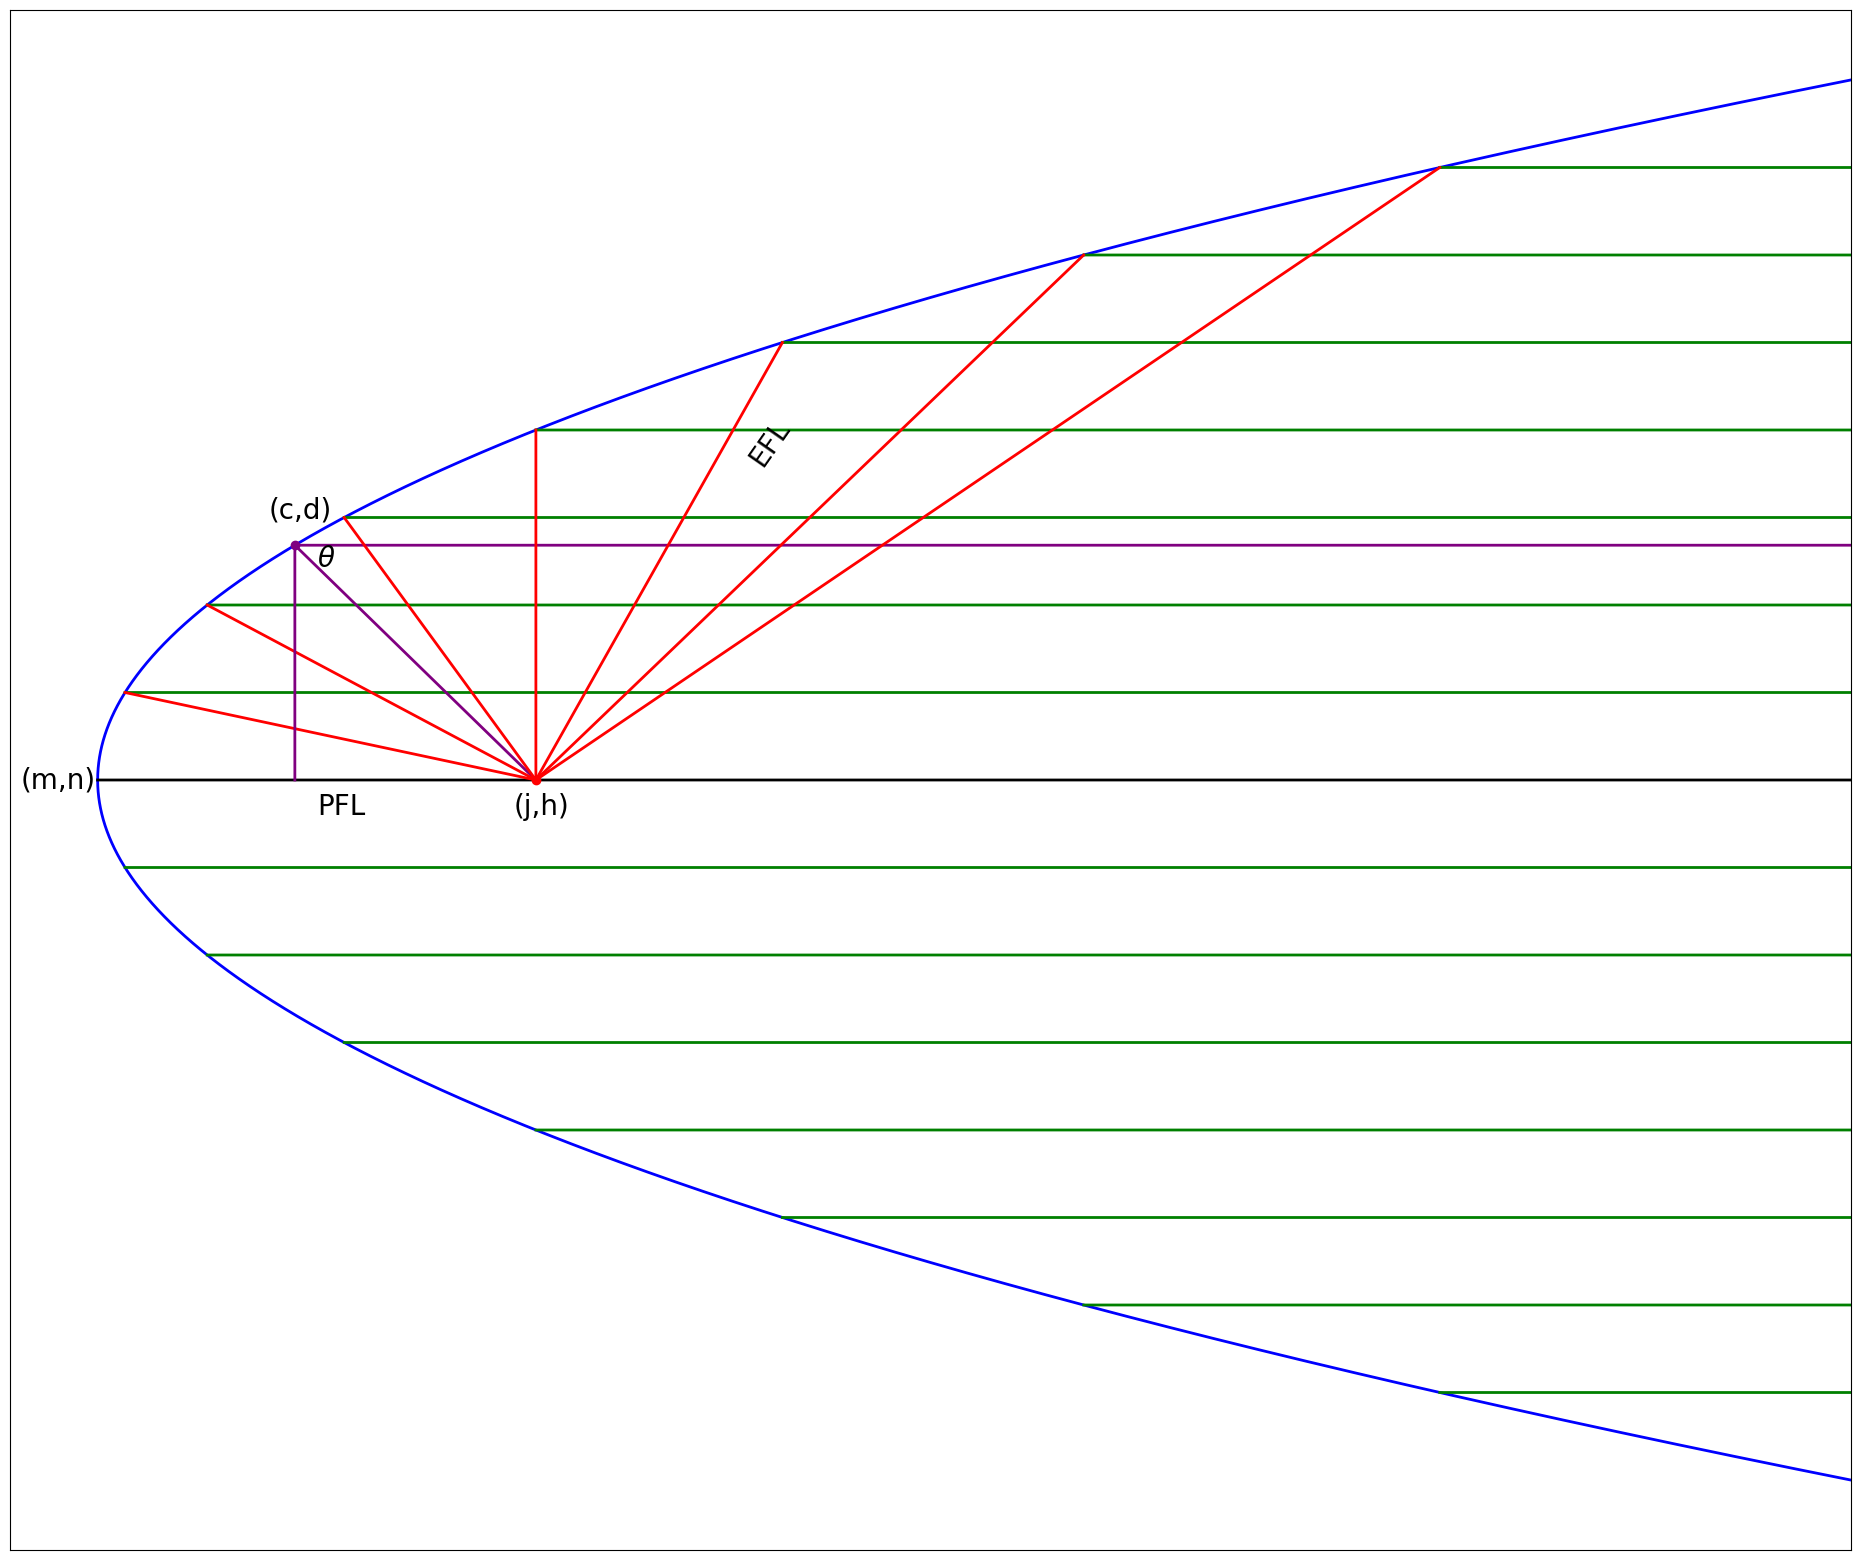

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt

#Short script to make a parabolic mirror diagram with several rays drawn for tracing
#We will draw a rightward facing parabola with a focus at (1,0) and vertex (0,0)

#Define range of the parabola
x = np.arange(0,4,.00001)

#Make the figure
fig = plt.figure(figsize=(23.75,20),frameon=False)

#Plot the parabola
plt.plot(x,2*np.sqrt(x),'b',linewidth=2)
plt.plot(x,-2*np.sqrt(x),'b',linewidth=2)

#Plot parallel rays (if statement so we don't plot the central axis in green)
for i in np.arange(-3.5,4,.5):
    if i==0:
        pass
    else:
        d = i
        c = (.5*d)**2
        x = np.arange(c,4,.00001)
        plt.plot(x,[d]*len(x),'g',linewidth=2)
    

#Define example turn mirror point and plot parallel ray and EFL
c = .45
d = 2*np.sqrt(c)
plt.plot(c,d,color='purple',marker='.',markersize=12)
x = np.arange(c,4,.00001)
plt.plot(x,[d]*len(x),'purple',linewidth=2)
x = np.arange(c,1,.00001)
t = d/(c-1)
plt.plot(x,t*x-t,'purple',linewidth=2)

#Plot parent focal segment
x = np.arange(0,4,.00001)
plt.plot(x,[0]*len(x),'k',linewidth=2)

#Plot leg of turn mirror triangle
y = np.arange(d,0,.00001)
plt.plot([c]*len(y),y,'purple',linewidth=2)

#Plot focus
plt.plot(1,0,'r.',markersize=12)

#Plot lines connecting parallel rays to focus
for i in np.arange(-3.5,0,.5):
    temp_d = i
    temp_c = (.5*temp_d)**2
    if temp_c<1:
        x = np.arange(temp_c,1,.00001)
    elif temp_c>1:
        x = np.arange(1,temp_c,.00001)
    elif temp_c==1:
        y = np.arange(temp_d,0,.00001)
        plt.plot([1]*len(y),-y,'r',linewidth=2)
    t = -temp_d/(temp_c-1)
    plt.plot(x,t*x-t,'r',linewidth=2)
    
#Plot the line perpendicular to the point (c,d)
y = np.arange(0,d,.0001)
plt.plot([c]*len(y),y,'purple',linewidth=2)

ax = plt.gca()    
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.xaxis.set_major_locator(plt.NullLocator())
ax.yaxis.set_major_locator(plt.NullLocator())
plt.text(.95,-.2,'(j,h)',fontsize=20)
plt.text(c-.06,d+.15,'(c,d)',fontsize=20)
plt.text(-.175,-.05,'(m,n)',fontsize=20)
plt.text(.5,-.2,'PFL',fontsize=20)
plt.text(1.475,1.8,'EFL',fontsize=20,rotation=55)
plt.text(c+.05,d-.125,r'$\theta$',fontsize=20)
plt.xlim([-.2,4])

plt.show()


In [10]:
cells = [
['\textrm{Mirror Half Width}','\text{%.2f mm}'%w],
['\textrm{Focus X Coordinate}','\text{%.2f mm}'%j],
['\textrm{Focus Y Coordinate}','\textrm{ %.2f mm}'%h],
['\textrm{Vertex X Coordinate}','\textrm{%.2f mm}'%m],
['\textrm{Vertex Y Coordinate}','\textrm{%.2f mm}'%n],
['\textrm{Parent Focal Length}','\textrm{ %.2f mm}'%PFL],
['\textrm{Effective Focal Length}','\textrm{ %.2f mm}'%EFL]
]

table=np.reshape(list(map(lambda x: '$'+latex(x)+'$',np.ravel(cells))),np.shape(cells))
df = DataFrame(table, index=['w', 'j', 'h', 'm', 'n','PFL', 'EFL'], 
               columns=['Description',latex('Value')])
df

NameError: name 'latex' is not defined

The following cells are used to determine the parameters for the turn mirror.

The turn mirror in Solidworks is easiest started from scratch due to weird behaviour when trying to modify the position of the focus and vertex in the parabola sketch. The steps for quickly sketching a new parabolic mirror are:

1) Choose start start sketching in the Front plane - the angle rotations will in Zemax will depend on this.

2) Sketch an off axis parabolic segment anywhere in the Front plane. (Try to have the segment straddle the origin).

3) Start by defining a horizontal relation between the vertex and focus point.

4) Draw a centerline between vertex and focus - this will be the rotation axis.

5) Smart dimension the appropriate distance between vertx and focus.

6) Set the position of the vertex point. The focus should fall into the right position. Fix these points. (You can now delete the dimension)

7) Place to reference points, symmetric about the origin - these will be used to define the extent of the mirror. Fix the points.

8) Define a vertical relationships between these two points and the two ends of the mirror. (It should now be centered and pass through the origin.)

9) Revolve this sketch, about the vertex/focus centerline by an appropriate amount (to be able to fill the transfer mirror).

N.B. Do not close the sketch - use a thin feature instead. The direction should be that the origin lies on the inner edge of the mirror.

10) You're done!

## Zemax Example

The following cell generates an example output for a Zemax table to define the transfer mirrors, turn mirrors, and place holders for the polarizers and moving mirror - since these all depend on the FTS design specs.  The rotation angles also depend on the planes chosen to define the SolidWorks models.  If things are modelled in different planes rotation angles will change by factors of $90^{\circ}$ or $180^{\circ}$.  

In [ ]:
#If statement to avoid confusion of converting theta on multiple runs of the cells:
if theta>1:
    theta = theta*pi/180

trans2x = -b
mov_x = -b/2
turn1_x,turn1_z = -b/2.5,-(2.5*D+5*r2+b/2.5*tan(theta))
turn2_x,turn2_z = -b+b/2.5,-(2.5*D+5*r2+b/2.5*tan(theta))
pol1_x,pol1_z = -b/2, 2*r2+D
pol2_x,pol2_z = -b/2, 4*r2+2*D
pol3_x,pol3_z = -b/2, -(2*r2+D)
pol4_x,pol4_z = -b/2, -(4*r2+2*D)
pt_x,pt_y = j,h

#Convert theta back into degrees for table
theta = theta*180/pi

cells = [
['\textrm{Transfer_Mirrors.IGS}','0','0','0','0','0','0','0'],
['\textrm{Transfer_Mirrors.IGS}','0','%.2f'%trans2x,'0','0','0','0','180'],
['\textrm{Moving Mirror}','0','%.2f'%mov_x,'0','0','90','45','0'],
['\textrm{Moving Mirror}','0','%.2f'%mov_x,'0','0','90','-45','0'],
['\textrm{Turn_Mirror.IGS}','0','%.2f'%turn1_x,'0','%.2f'%turn1_z,'90','0','%.2f'%theta],
['\textrm{Turn_Mirror.IGS}','0','%.2f'%turn2_x,'0','%.2f'%turn2_z,'90','180','%.2f'%theta],
['\textrm{Turn_Mirror.IGS}','0','%.2f'%turn1_x,'0','%.2f'%-turn1_z,'-90','0','%.2f'%theta],
['\textrm{Turn_Mirror.IGS}','0','%.2f'%turn2_x,'0','%.2f'%-turn2_z,'-90','180','%.2f'%theta],
['\textrm{Polarizer}','0','%.2f'%pol1_x,'0','%.2f'%pol1_z,'0','90','0'],
['\textrm{Polarizer}','0','%.2f'%pol2_x,'0','%.2f'%pol2_z,'0','90','0'],
['\textrm{Polarizer}','0','%.2f'%pol3_x,'0','%.2f'%pol3_z,'0','90','0'],
['\textrm{Polarizer}','0','%.2f'%pol4_x,'0','%.2f'%pol4_z,'0','90','0'],
['\textrm{Source}','5','%.2f'%pt_x,'%.2f'%pt_y,'0','-90','%.2f'%theta,'0']
]

table=np.reshape(map(lambda x: '$'+latex(x)+'$',np.ravel(cells)),np.shape(cells))
df = DataFrame(table, index=['CAD','CAD','Ellipse','Ellipse','CAD','CAD','CAD','CAD','Ellipse','Ellipse','Ellipse','Ellipse','Point'], 
               columns=['Comment','Ref','X','Y','Z',latex('$X_{\Theta}$'),latex('$Y_{\Theta}$'),latex('$Z_{\Theta}$')])
df

<>:36: SyntaxWarning: invalid escape sequence '\T'
<>:36: SyntaxWarning: invalid escape sequence '\T'
<>:36: SyntaxWarning: invalid escape sequence '\T'
<>:36: SyntaxWarning: invalid escape sequence '\T'
<>:36: SyntaxWarning: invalid escape sequence '\T'
<>:36: SyntaxWarning: invalid escape sequence '\T'
C:\Users\paul\AppData\Local\Temp\ipykernel_18648\386484849.py:36: SyntaxWarning: invalid escape sequence '\T'
  columns=['Comment','Ref','X','Y','Z',latex('$X_{\Theta}$'),latex('$Y_{\Theta}$'),latex('$Z_{\Theta}$')])
C:\Users\paul\AppData\Local\Temp\ipykernel_18648\386484849.py:36: SyntaxWarning: invalid escape sequence '\T'
  columns=['Comment','Ref','X','Y','Z',latex('$X_{\Theta}$'),latex('$Y_{\Theta}$'),latex('$Z_{\Theta}$')])
C:\Users\paul\AppData\Local\Temp\ipykernel_18648\386484849.py:36: SyntaxWarning: invalid escape sequence '\T'
  columns=['Comment','Ref','X','Y','Z',latex('$X_{\Theta}$'),latex('$Y_{\Theta}$'),latex('$Z_{\Theta}$')])
C:\Users\paul\AppData\Local\Temp\ipykernel_

ValueError: cannot reshape array of size 1 into shape (13,8)

To help with the ray trace analysis and avoid scattering rays everywhere in the system set Face 0 on the transfer mirrors absorbing and Face 5-11 to reflective.  For the turn mirrors Face 2 can be reflective, with the rest of the faces as absorbing.

## Ray Analysis Éntendue

The following cell can be used to get an estimate of the expected étendue through the system given the width and length of the source region (as defined by some percentage of rays through the system) as well as the area of the transfer mirror and distance to the source (EFL).

In [ ]:
w = 20. #width of source region [mm]
l = 10. #length of source region [mm]
A = pi*r1*r2 #Area of transfer mirror

#Calculating the solid angle of the source region. See http://www2.mpia-hd.mpg.de/~mathar/public/mathar20051002.pdf
alpha = w/(2*EFL)
beta = l/(2*EFL)

Omega = 4*arccos(sqrt((1+alpha**2+beta**2)/((1+alpha**2)*(1+beta**2))))

Etendue = A*Omega

Etendue

## Comparison Table

The following cells calculate the various parameters for the system according to the original equations given by Dale.  They are largely the same except for factors of 2.  This table can be used to compare to values calculated by Jeff.

There a duplications of the cells above as well, to avoid having to rerun the whole notebook to compare values.

In [ ]:
from numpy import *

#User defined parameters
E = 420. #Etendue [mm^2 sr]
f = 175. #Maximum frequency [GHz]
del_f = .5 #Resolution [GHz]
D = 2.19 #Mirror spacing [mm]
EFL = 600. #Effective focal length [mm] 

In [ ]:
#Equation 1
r1 = (1/(pi))*sqrt(E*(f/(2*del_f)))

#Equation 2
phi = 2*arcsin(sqrt(del_f/(2*f)))

#Equation 3
Y = 2*r1+2*D

#Equation 5
X = r1/tan(phi)
b = X

#Combining equations 6 & 7
A = (b/r1)**2-4
B = -4*D
C = -(b**2+D**2)

r2 = (-B+sqrt(B**2-4*A*C))/(2*A)

#Equation 7
a = b*(r2/r1)

#Equation 4
Z  =12*r2+7*D

#Equation 8
H = b*(1-(1-(r2/a)**2)**(1./2.))

#Equation 9
A = 2*r1
B = sqrt((r1+D)**2+b**2)
C = sqrt((3*r1+D)**2+b**2)

psi = arccos((B**2+C**2-A**2)/(2*B*C))*180/pi

#Equation 10
theta = arctan((2*r1+D)/b)

#Converting phi/theta to degrees and renaming etendue for table display
phi = phi*180/pi
theta = theta*180/pi
et = E

In [ ]:
from numpy import *

#User defined parameters
E_J = 420. #Etendue [mm^2 sr]
f_J = 175. #Maximum frequency [GHz]
del_f_J = .5 #Resolution [GHz]
theta_J = 12.33 #Mirror spacing [mm]
EFL_J = 600. #Effective focal length [mm] 

In [ ]:
#Equation 1
r1_J = (1/(2*pi))*sqrt(E_J*(f_J/(del_f_J)))

#Equation 2
phi_J = 2*arcsin(sqrt(del_f_J/(f_J)))

#Equation 5
X_J = r1_J/tan(phi_J)
b_J = X_J

#Invert equation 10 to find D since Jeff provides theta (using r1 instead of r2 ~tenths percent error)
D_J = b_J*tan(theta_J*pi/180)-2*r1_J

#Combining equations 6 & 7
A_J = (b_J/r1_J)**2-4
B_J = -4*D_J
C_J = -(b_J**2+D_J**2)

r2_J = (-B_J+sqrt(B_J**2-4*A_J*C_J))/(2*A_J)

#Equation 3
Y_J = 2*r1_J+2*D_J

#Equation 7
a_J = b_J*(r2_J/r1_J)

#Equation 4
Z_J  =12*r2_J+7*D_J

#Equation 8
H_J = b_J*(1-(1-(r2_J/a_J)**2)**(1./2.))

#Equation 9
A_J = 2*r1_J
B_J = sqrt((r1_J+D_J)**2+b_J**2)
C_J = sqrt((3*r1_J+D_J)**2+b_J**2)

psi_J = arccos((B_J**2+C_J**2-A_J**2)/(2*B_J*C_J))*180/pi

#Converting phi/theta to degrees and renaming etendue for table display
phi_J = phi_J*180/pi
et_J = E_J

In [ ]:
#Output table with FTS specs
from sympy import *
from pandas import DataFrame
init_printing()

cells = [
['\textrm{Resolution}','\text{%.2f GHz}'%del_f,'\text{%.2f GHz}'%del_f_J],
['\textrm{Maximum Frequency}','\textrm{ %d GHz}'%f,'\textrm{ %d GHz}'%f_J],
['\textrm{Étendue}','%d mm^{2} sr'%et,'%d mm^{2} sr'%et_J],
['\textrm{Dispersion Angle}','%.2f^{\circ}'%phi,'%.2f^{\circ}'%phi_J],
['\textrm{Mirror Spacing}','\textrm{%.2f mm}'%D,'\textrm{%.2f mm}'%D_J],
['\textrm{Width}','\textrm{ %.2f mm}'%X,'\textrm{ %.2f mm}'%X_J],
['\textrm{Height}','\textrm{ %.2f mm}'%Y,'\textrm{ %.2f mm}'%Y_J],
['\textrm{Length}','\textrm{ %.2f mm}'%Z,'\textrm{ %.2f mm}'%Z_J],
['\textrm{Semimajor Axis}','\textrm{ %.2f mm}'%a,'\textrm{ %.2f mm}'%a_J],
['\textrm{Semiminor Axis}','\textrm{ %.2f mm}'%b,'\textrm{ %.2f mm}'%b_J],
['\textrm{Semimajor Radius}','\textrm{ %.2f mm}'%r1,'\textrm{ %.2f mm}'%r1_J],
['\textrm{Semiminor Radius}','\textrm{ %.2f mm}'%r2,'\textrm{ %.2f mm}'%r2_J],
['\textrm{Mirror Depth}','\textrm{ %.2f mm}'%H,'\textrm{ %.2f mm}'%H_J],
['\textrm{Opening Angle}','%.2f^{\circ}'%psi,'%.2f^{\circ}'%psi_J],
['\textrm{Off Axis Angle Angle}','%.2f^{\circ}'%theta,'%.2f^{\circ}'%theta_J]
]

table=np.reshape(map(lambda x: '$'+latex(x)+'$',np.ravel(cells)),np.shape(cells))
df = DataFrame(table, index=['$\delta$ f', 'f', 'E', '$\phi$','D','X', 'Y', 'Z', 'a', 'b', 'r1', 'r2', 'H', '$\psi$', '$\theta$'], 
               columns=['Description','Value (Paul)', 'Value (Jeff)'])
df

,Description,Value (Paul),Value (Jeff)
$\delta$ f,$\textrm{Resolution}$,$\text{0.50 GHz}$,$\text{0.50 GHz}$
f,$\textrm{Maximum Frequency}$,$\textrm{ 175 GHz}$,$\textrm{ 175 GHz}$
E,$\textrm{Étendue}$,$420 mm^{2} sr$,$420 mm^{2} sr$
$\phi$,$\textrm{Dispersion Angle}$,$4.33^{\circ}$,$6.13^{\circ}$
D,$\textrm{Mirror Spacing}$,$\textrm{2.19 mm}$,$\textrm{2.19 mm}$
X,$\textrm{Width}$,$\textrm{ 1139.15 mm}$,$\textrm{ 568.35 mm}$
Y,$\textrm{Height}$,$\textrm{ 176.97 mm}$,$\textrm{ 126.42 mm}$
Z,$\textrm{Length}$,$\textrm{ 1063.29 mm}$,$\textrm{ 765.71 mm}$
a,$\textrm{Semimajor Axis}$,$\textrm{ 1152.80 mm}$,$\textrm{ 582.42 mm}$
b,$\textrm{Semiminor Axis}$,$\textrm{ 1139.15 mm}$,$\textrm{ 568.35 mm}$
